# Bonds and Treasury Notes of the War of 1812

By David Cho and Alexander Dubasov

## Historical Context

In the decade leading up to the War of 1812, “republican simplicity” dictated national economic and financial policy. However, in the final years before the outbreak of war, the nation’s finances and banking system were in a precarious position. Before the war, land sales and customs duties generated most of the government’s revenue. The government did not impose an income tax on its citizens. 

## Outline 
Bonds and treasury notes issued during the war, according to Richard Bayley: 

1. Six Percent Loan of 1812
2. Temporary loan of 1812
3. Treasury Notes of 1812
4. Exchanged 6% Stock
5. Sixteen Million Loan of 1813
6. Treasury Notes of 1813
7. Seven and One-Half Million Loan of 1813
8. Treasury Notes of March, 1814 
9. Ten Million Loan of 1814 
10. Six Million Loan of 1814
11. Undesignated Loan of 1814
12. Mississippi Stock
13. Temporary Loan of 1814 
14. Treasury Notes of December, 1814
15. Direct-Tax Loan
16. Temporary Loan of February 1815
17. Seven Per Cent. Stock of 1815
18. Treasury Notes of 1815
19. Small Treasury Notes of 1815
20. Treasury Note Stock of 1815
21. Temporary Loan of March, 1815
22. Six Per Cent. Loan of 1815

Each mini bond/note bio includes information on 

- Features for each bond/note
- Historical context and reasons for issuance
- How was the bond marketed?
- Who bought the bonds and notes?
- Sources 

Each mini bond/note bio includes the following graphs  

- Market Price: price of bond/note on the open market over time (dataset: `BondPrice.csv`)
- Quantity: quantity outstanding of bond/note over time (dataset: `BondQuant.csv`)  


In [27]:
# Import Data
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import mplcursors
import numpy as np 
from matplotlib.dates import DateFormatter, MonthLocator, YearLocator
from matplotlib.ticker import FuncFormatter
bond_price = pd.read_csv("data/BondPrice.csv")
bond_quant = pd.read_csv("data/BondQuant.csv") 

%matplotlib widget

In [38]:
# reformat dataframe to create separate timestamp and price columns 
# drop NaN columns 
def melt_clean_price(df):
    # Drop columns with NaN 
    clean_df = df.dropna(axis=1) 
    df_melted = clean_df.melt(var_name='Timestamp', value_name='Price')
    df_melted = df_melted.iloc[2:].reset_index(drop=True)
    return df_melted

# Graph for price function
def graph_price(df, title):
    # convert timestamp dtype into datetime dtype
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    # Set up Seaborn plot
    fig, ax = plt.subplots(figsize=(10, 6))
    scatplot = sns.scatterplot(data=df, x='Timestamp', y='Price', marker='o')
    #scatplot.axvspan(xmin=pd.Timestamp("1819"), xmax=pd.Timestamp("1822"), fc="#E0837F")
    # Format x-axis ticks to show year 
    date_form = DateFormatter("%Y")
    plt.gca().xaxis.set_major_formatter(date_form)
    plt.gca().xaxis.set_major_locator(YearLocator())
    # Get the minimum and maximum dates with data (assuming 'date' is a datetime type)
    min_date = df['Timestamp'].min()
    max_date = df['Timestamp'].max()
    # Set the x-axis limits to exclude extra years
    plt.xlim(min_date, max_date)

    # Enhance plot aesthetics (optional)
    plt.xlabel('Year')
    plt.ylabel('Market Price (Dollars)')
    plt.title(title)
    plt.grid(True)

    # Add hovering features 
    def show_hover_panel(get_text_func=None):
        cursor = mplcursors.cursor(
            scatplot, 
            hover=2,  # Transient
            annotation_kwargs=dict(
                bbox=dict(
                    boxstyle="square,pad=0.5",
                    facecolor="white",
                    edgecolor="#ddd",
                    linewidth=0.5,
                    path_effects=[pe.withSimplePatchShadow(offset=(1.5, -1.5))],
                ),
                linespacing=1.5,
                arrowprops=None,
            ),
            highlight=True,
            highlight_kwargs=dict(linewidth=2),
        )
    
        if get_text_func:
            cursor.connect(
                event="add",
                func=lambda sel: sel.annotation.set_text(get_text_func(df, sel.index)),
            )
    
        return cursor
    
    
    def on_add(df, index):
        item = df.iloc[index]
        parts = [
            f"Date: {item.Timestamp.strftime('%Y-%m-%d')}",
            f"Price: {item.Price:,.2f}",
        ]
    
        return "\n".join(parts)

    show_hover_panel(on_add) # add cursor hover features 

    plt.plot(df['Timestamp'], df['Price'])
    
    return plt # return completed figure 

In [39]:
# clean quant dataframe 
# returns a series with chosen row 
def clean_quant(quant_df):
    subset_cols = quant_df.columns[2:] 
    # Drop rows where all columns are Nan 
    temp_clean_quant_df = quant_df.dropna(how="all", subset=subset_cols).dropna(axis=1)
    # print(clean_six_percent_prices)
    # print(temp_clean_six_percent_quant)
    
    # Define the threshold
    threshold = 0.001
    # Function to check if all values in a column are close to zero
    def is_close_to_zero(col, threshold):
        return np.all(np.abs(col) < threshold)
    
    cols_to_drop = [col for col in temp_clean_quant_df.iloc[:, 2:].columns if is_close_to_zero(temp_clean_quant_df[col], threshold)]
    
    # Drop the columns
    clean_quant_df = temp_clean_quant_df.drop(columns=cols_to_drop)
    return clean_quant_df
    # print(clean_quant_df) 

def reformat_quant(clean_quant_df, row):
    # reformat dataframe to include timestamp and quant columns 
    series_data = clean_quant_df[clean_quant_df["Series"] == row].melt(var_name='Timestamp', value_name='Quant')
    series_data = series_data.iloc[2:].reset_index(drop=True)
    series_data['Timestamp'] = pd.to_datetime(series_data['Timestamp']) #convert timestamp column to a datetime object 
    return series_data # return the selected row 

# graphing function
def graph_quant(df, title, axis):
    # Set up Seaborn plot
    fig, ax = plt.subplots(figsize=(10, 6))
    # lineplot = sns.lineplot(data=df, x="Timestamp", y="Quant") 
    scatplot = sns.scatterplot(data=df, x='Timestamp', y='Quant', marker='o')
    #scatplot.axvspan(xmin=pd.Timestamp("1819"), xmax=pd.Timestamp("1822"), fc="#E0837F")
    # Format x-axis ticks to show year 
    date_form = DateFormatter("%Y")
    plt.gca().xaxis.set_major_formatter(date_form)
    plt.gca().xaxis.set_major_locator(YearLocator(2))
    # Get the minimum and maximum dates with data (assuming 'date' is a datetime type)
    min_date = df['Timestamp'].min()
    max_date = df['Timestamp'].max()
    # Set the x-axis limits to exclude extra years
    plt.xlim(min_date, max_date)

    # reformat y-axis to be in millions, not tens of millions
    if axis == "mil":
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1e6)))
        plt.ylabel('Total Outstanding (millions)')
    elif axis == "ht": 
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1e5)))
        plt.ylabel('Total Outstanding (hundred thousands)')

    # Enhance plot aesthetics (optional)
    plt.xlabel('Year')
    plt.title(title)
    plt.grid(True)

        # Add hovering features 
    def show_hover_panel(get_text_func=None):
        cursor = mplcursors.cursor(
            scatplot, 
            hover=2,  # Transient
            annotation_kwargs=dict(
                bbox=dict(
                    boxstyle="square,pad=0.5",
                    facecolor="white",
                    edgecolor="#ddd",
                    linewidth=0.5,
                    path_effects=[pe.withSimplePatchShadow(offset=(1.5, -1.5))],
                ),
                linespacing=1.5,
                arrowprops=None,
            ),
            highlight=True,
            highlight_kwargs=dict(linewidth=2),
        )
    
        if get_text_func:
            cursor.connect(
                event="add",
                func=lambda sel: sel.annotation.set_text(get_text_func(df, sel.index)),
            )
    
        return cursor
    
    
    def on_add(df, index):
        item = df.iloc[index]
        parts = [
            f"Date: {item.Timestamp.strftime('%Y-%m-%d')}",
            f"Quant: {item.Quant:,.2f}",
        ]
    
        return "\n".join(parts)

    show_hover_panel(on_add) # add cursor hover features 
    
    plt.plot(df['Timestamp'], df['Quant'])
    return plt

# Add a historical marker
# An important event 
def add_marker(axis, event_str, date, price):
    axis.annotate(event_str,
            xy=(pd.Timestamp(date), price), xycoords='data',
            xytext=(30, 10), textcoords='offset points', size=8, 
            arrowprops=dict(facecolor='black', shrink=0.05))

# color background to define a period
def add_period(plot, begin, end):
    # ax.text(pd.Timestamp("1820-06"), 90, 'Panic of 1819', horizontalalignment='center')
    plot.axvspan(xmin=pd.Timestamp(begin), xmax=pd.Timestamp(end), fc="#E0837F")

## Six Percent Loan of 1812

### Overview and Features
1. Authorized By: <i>Act of March 14, 1812</i> (three months before war)
2. President can borrow <b>no more</b> than \$ 11 million.
3. Interest Rate: 6%
    4. Most government bonds had an interest rate of 5%-6% since 1801 [2] 
5. Payment Frequency: Quarterly
6. 12-year loan (reimbursable on January 1, 1825)
7. Final Redemption: March 12, 1833 
8. Buyers could not sell stock certificates below par value.
9. The Treasury obtained <b>\$ 8,134,700</b> through issuing these stock certificates.
10. Temporary loan of $2,150,000 obtained under special contracts with various banks.
11. These loans, totaling <b>\$ 10,284,700</b> (8,134,700 + 2,150,000), have been completely repaid. 

### Marketing 
1. Overview: Banks and individuals were not interested in buying government debt 
2. Unimpressive: The modest interest rate (6%) did not excite many buyers.
3. The war question: Potential buyers did not buy because they were nervous that the United States could suffer defeat against Britain (the largest army and navy).
4. Lack of a market: Primarily regional securities markets
5. Lack of capability: American firms could not underwrite large securities issues, and American agents in Europe could not underwrite American securities issues.
6. The "solution": Due to the lack of capability, the Treasury announced the bonds and simply waited for investors to come.  
7. Consequences: Due to the lack of subscribers, Congress issued \$5 million worth of treasury notes (Treasury Notes of 1812).

### Who Bought Them? 
1. \$4.2 million bought by banks for their long-term portfolios.
2. \$2.0 million bought by individuals.
3. Attempts at better marketing: Gallatin (Treasury Secretary) wanted to increase interest rates from 6% and sell bonds at a discount; the proposal was rejected by Madison.
4. Reasons for failure: New Englanders remained unsympathetic to the war. Congress did not find a way to fulfill interest payments. 

#### Sources
[1] Dissertation (147)

[2] American Public Finance and Financial Services (327-330) 

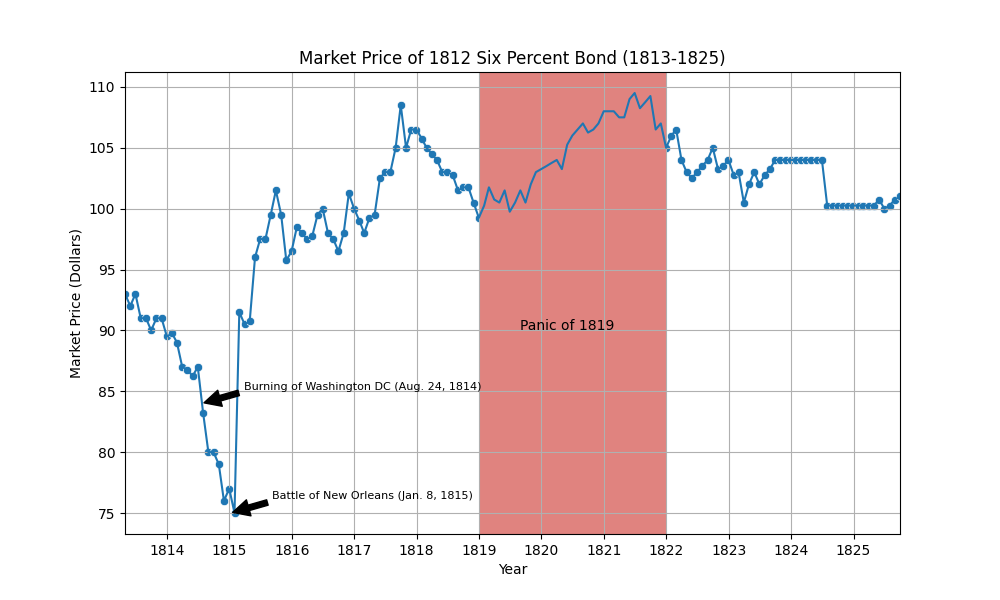

'\nax.annotate(\'Burning of Washington DC (Aug. 24, 1814)\',\n            xy=(pd.Timestamp("1814-7-24"), 84), xycoords=\'data\',\n            xytext=(30, 10), textcoords=\'offset points\',\n            arrowprops=dict(facecolor=\'black\', shrink=0.05))\n\nax.annotate(\'Battle of New Orleans (Jan. 8, 1815)\',\n            xy=(pd.Timestamp("1815-1-08"), 75), xycoords=\'data\',\n            xytext=(30, 10), textcoords=\'offset points\',\n            arrowprops=dict(facecolor=\'black\', shrink=0.05))\n'

In [40]:
%matplotlib widget
# Six percent loan of 1812 
# prices 
six_percent_prices = bond_price[bond_price["L1 ID"] == 20048] 
six_percent_prices_melted = melt_clean_price(six_percent_prices) # clean and melt (reformat) dataframe 
six_percent_plot = graph_price(six_percent_prices_melted, 'Market Price of 1812 Six Percent Bond (1813-1825)')

# historical annotations 
add_marker(six_percent_plot, 'Burning of Washington DC (Aug. 24, 1814)', "1814-7-24", 84)
add_marker(six_percent_plot, 'Battle of New Orleans (Jan. 8, 1815)', "1815-1-08", 75) 
# Panic of 1819 
add_period(six_percent_plot, "1819", "1822")
six_percent_plot.text(pd.Timestamp("1820-06"), 90, 'Panic of 1819', horizontalalignment='center')

six_percent_plot.show()

"""
ax.annotate('Burning of Washington DC (Aug. 24, 1814)',
            xy=(pd.Timestamp("1814-7-24"), 84), xycoords='data',
            xytext=(30, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('Battle of New Orleans (Jan. 8, 1815)',
            xy=(pd.Timestamp("1815-1-08"), 75), xycoords='data',
            xytext=(30, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05))
""" 

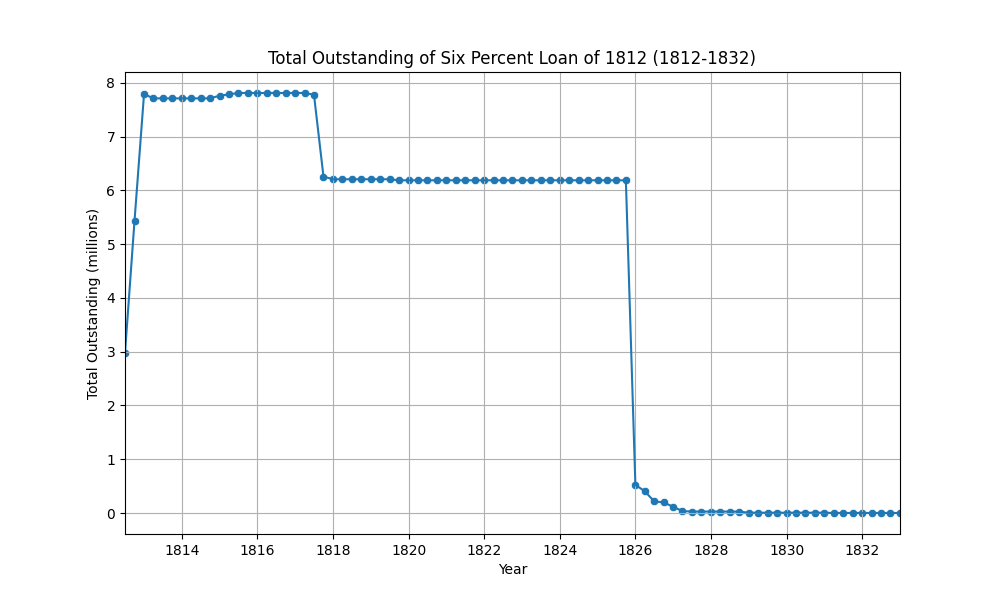

True


In [41]:
# quantities 
six_percent_quant = bond_quant[bond_quant["L1 ID"] == 20048]
clean_six_percent_quant = clean_quant(six_percent_quant)
#print(clean_six_percent_quant) 
total_outstanding = reformat_quant(clean_six_percent_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Six Percent Loan of 1812 (1812-1832)", "mil") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_six_percent_quant, "Public Holdings")
#public_holdings.show()
print(public_holdings.equals(total_outstanding))

### Explanation 
First quantity record shows a total outstanding of approximately 3 million at the end of June 1813. By the end of 1813, total oustanding increases to 7.7 million. Slight uptick at the end of 1814, at the war's conclusion. Quantity drops from 7.78 million to 6.26 million between July and September of 1817; 19.57% decrease. 

## Temporary Loan of 1812

### Overview and Features
### Marketing
### Who Bought Them?
#### Sources 

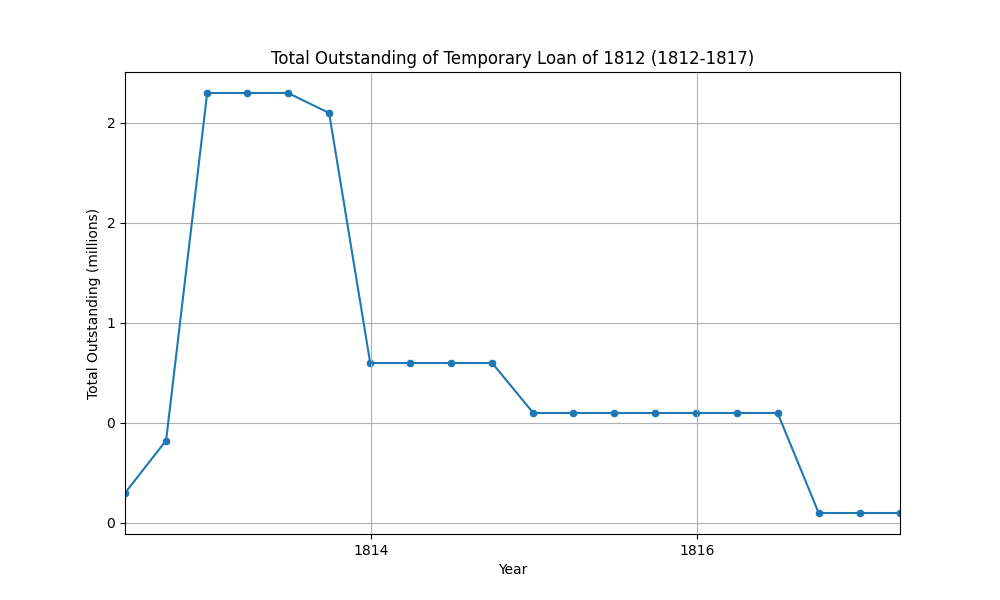

True


In [7]:
# temporary loan of 1812 
# prices - no price data 
"""
temp_loan_1812_prices = bond_price[bond_price["L1 ID"] == 20049] 
temp_loan_1812_prices_melted = melt_clean_price(temp_loan_1812_prices) # clean and melt (reformat) dataframe 
print(temp_loan_1812_prices_melted)
temp_loan_1812 = graph_price(temp_loan_1812_prices_melted, 'Market Price of Temporary Loan of 1812 (1813-1825)')
temp_loan_1812.show()
"""

# quantities 
temp_loan_1812_quant = bond_quant[bond_quant["L1 ID"] == 20049]
clean_temp_loan_1812_quant = clean_quant(temp_loan_1812_quant)
total_outstanding = reformat_quant(clean_temp_loan_1812_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Temporary Loan of 1812 (1812-1817)", "mil") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_temp_loan_1812_quant, "Public Holdings")
#public_holdings.show()
print(public_holdings.equals(total_outstanding))

## Treasury Notes of 1812

### Overview and Features
1. Authorized By: <I>Act of June 30, 1812</i>
2. Why: Failure of the Six Percent Loan of 1812 to attract enough buyers
3. Detractors: Congressmen opposed the Treasury notes and wanted to use other revenue sources such as taxation. They argued banks and people scared of paper money would not purchase treasury notes because they weren't worth as much in gold or silver and that they would appreciate like the Continental Currency during the American Revolution.
5. No more than <b>\$ 5 million</b> could be issued.
6. Interest Rate: 5.4%
7. Frequency: At maturity
8. First Issue Denominations: \\$ 100, \$ 1000
9. 1-year loan (reimbursable 1 year from date)
10. Sold: at par

### Marketing
1. Versatility: Treasury notes would be used to pay off taxes, duties, and debts.
2. Convertible: Treasury notes could now be exchanged for long-term bonds paying 7 percent interest.
3. Supporters: Silver was in short supply and gold was undervalued. Therefore, coins could not be made. Treasury notes were seen as a good replacement for the First Bank of the US's notes. Depreciation would be avoided because notes could be used to pay off taxes and banks would keep them in their reserves. 

### Who Bought Them?
1. <b>$3.5 million</b> sold to banks, mostly located in Mid-Atlantic states.
2. By December 1, the remaining bills were sold off, many going to New England.
3. Report by Treasury Secretary Alexander Dallas (1814-1816) to Congress: Treasury notes were bought primarily by "necessitous creditors, or contractors in distress, or commissaries, quartermasters, and navy agents acting officially." 
4. Usage: Kagin cites the Niles Weekly Register, who observed how banks primarily used the treasury notes as reserves, meaning they were not circulating. In his report to Congress, Secretary Dallas states most notes went towards paying taxes.
#### Sources
- Dissertation
- Richard Bayley
- American Numismatic Association
- Monetary Aspects of the Treasury Notes of the War of 1812 by Donald H. Kagin 

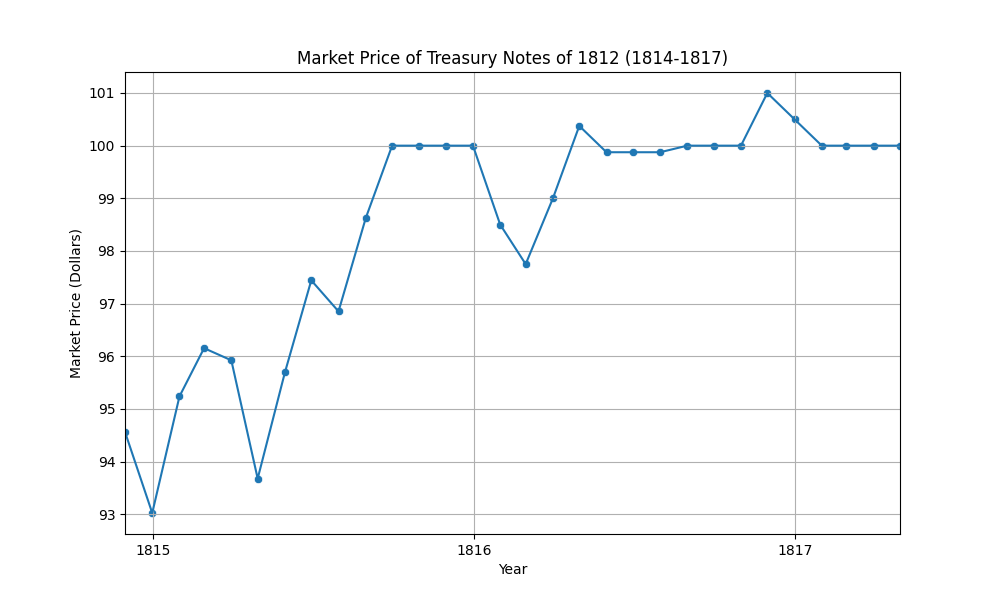

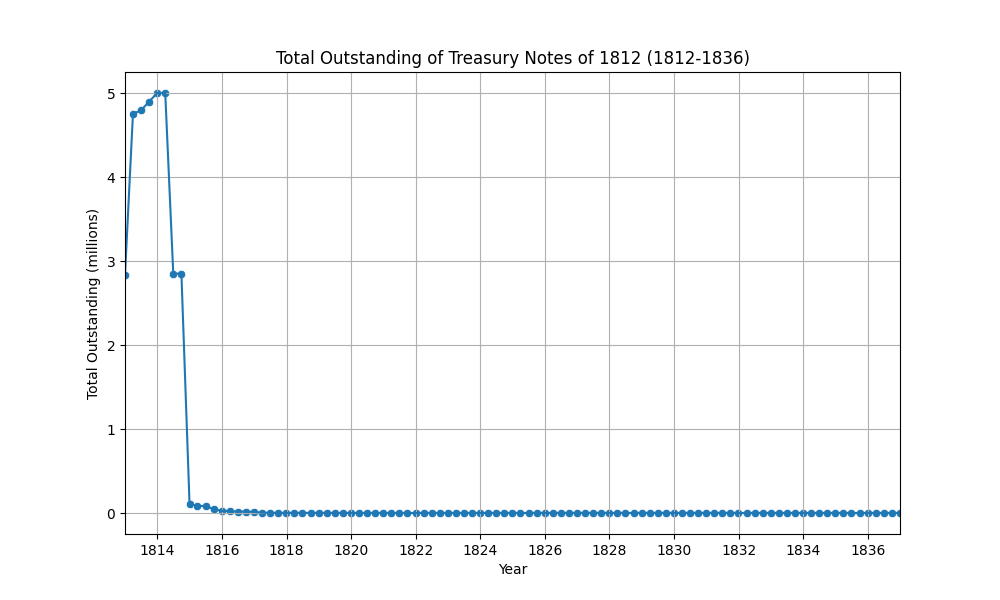

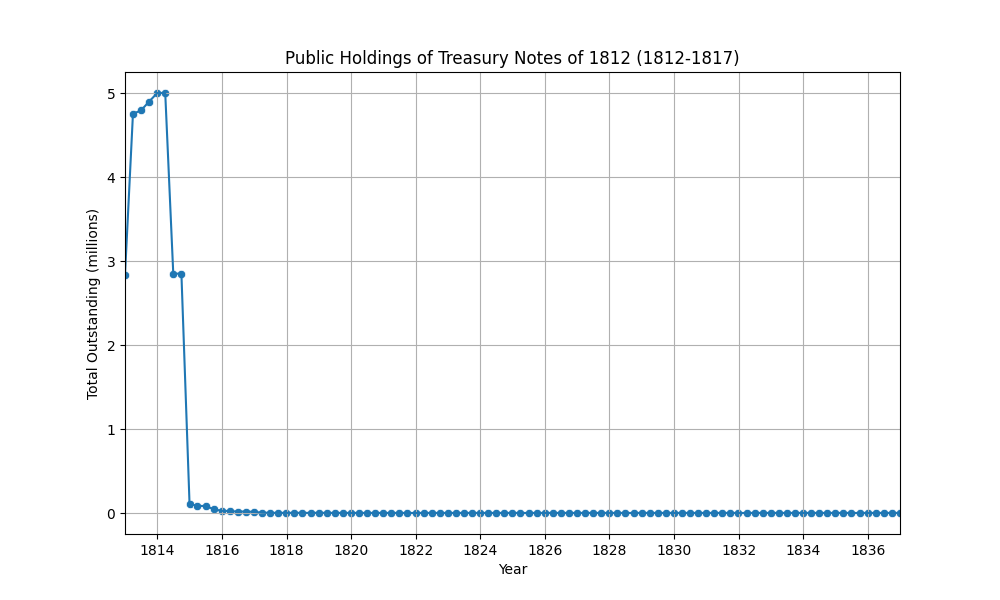

True


In [8]:
# treasury notes of 1812 prices 
treasure_notes_prices = bond_price[bond_price["L1 ID"] == 20050] 
treasure_notes_melted = melt_clean_price(treasure_notes_prices) # clean and melt (reformat) dataframe 
# print(treasure_notes_melted) 
treasure_notes = graph_price(treasure_notes_melted, 'Market Price of Treasury Notes of 1812 (1814-1817)')
treasure_notes.show()

# quantities 
treasure_notes_1812_quant = bond_quant[bond_quant["L1 ID"] == 20050]
clean_treasure_notes_1812_quant = clean_quant(treasure_notes_1812_quant)
# print(clean_treasure_notes_1812_quant) 
total_outstanding = reformat_quant(clean_treasure_notes_1812_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Treasury Notes of 1812 (1812-1836)", "mil") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_treasure_notes_1812_quant, "Public Holdings")
public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Treasury Notes of 1812 (1812-1817)", "mil") 
public_holdings_plot.show()
print(public_holdings.equals(total_outstanding))

## Exchanged Six Percent Stock

### Overview and Features
1. Authorized By: <I>An Act authorizing a subscription for the old six percent and deferred stocks, and providing an exchange for the same. </i>
2. What it did: Allowed individuals to reinvest in the old and deferred Six Percent stock in exchange for certificates, promising to pay back the principal amount. 
3. Interest rate: 6% 
### Marketing
### Who Bought Them?
#### Sources 

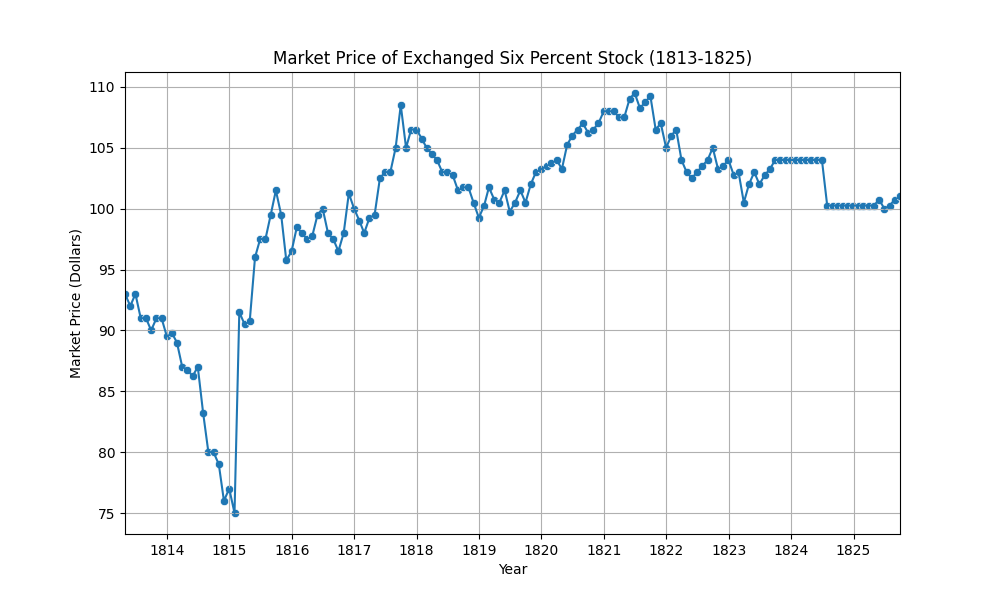

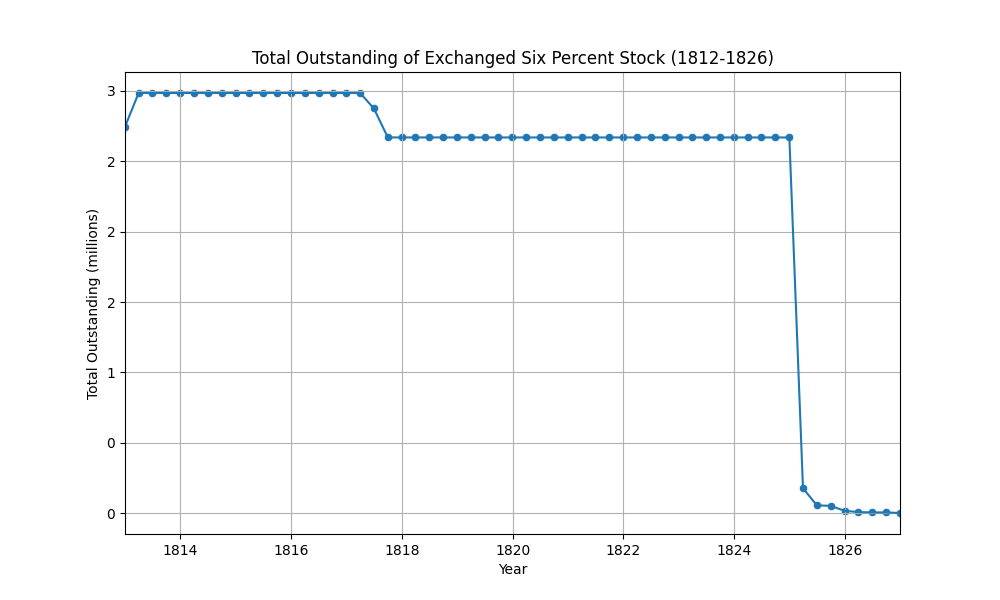

True


In [10]:
# Exchanged 6% stock 
exchanged_six_prices = bond_price[bond_price["L1 ID"] == 20051] 
exchanged_six_melted = melt_clean_price(exchanged_six_prices) # clean and melt (reformat) dataframe 
exchanged_six = graph_price(exchanged_six_melted, 'Market Price of Exchanged Six Percent Stock (1813-1825)') 
exchanged_six.show()

# quantities 
exchanged_six_quant = bond_quant[bond_quant["L1 ID"] == 20051]
clean_exchanged_six_quant = clean_quant(exchanged_six_quant)
total_outstanding = reformat_quant(clean_exchanged_six_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Exchanged Six Percent Stock (1812-1826)", "mil") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_exchanged_six_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()
print(public_holdings.equals(total_outstanding))

## Sixteen Million Loan of 1813 

### Overview and Features
1. Authorized By: Act of February 8, 1813
2. Why: Treasury notes and import duties failed to cover war expenses. 
3. Authorized: \$ 16 million.
4. Interest Rate: 6%
5. Frequency: Quarterly
6. Redeemable: January 1, 1826 
7. Commissions: 1/4th of 1% for agents
8. Sold: 88 percent face value
9. Issued: \\$ 18,109,377.43 (\\$ 2,109,377.43 due to discount + the authorized \$ 16 million)

### Marketing
1. Context: Banking institutions did not buy the bonds. Potential buyers were scared by America losing the war. By March, the loan had a shortfall of \$ 10 million. Therefore, Gallatin began relying on wealthy individuals to make up for the deficit. 
2. Stephen Girard: French native; banker and financier; operated a private bank in Philadelphia; private letters reveal focus on profit; friends with Secretary Gallatin; agreed to help make up for the \\$ 10 million shortfall; his decision increased public confidence; personal share: \$ 2,483,000 
3. David Parish:
4. John Jacob Astor:

#### Sources
- Dissertation
- Girard to the Rescue: Stephen Girard and the War Loan of February 8, 1813 by Mark T. Hensen

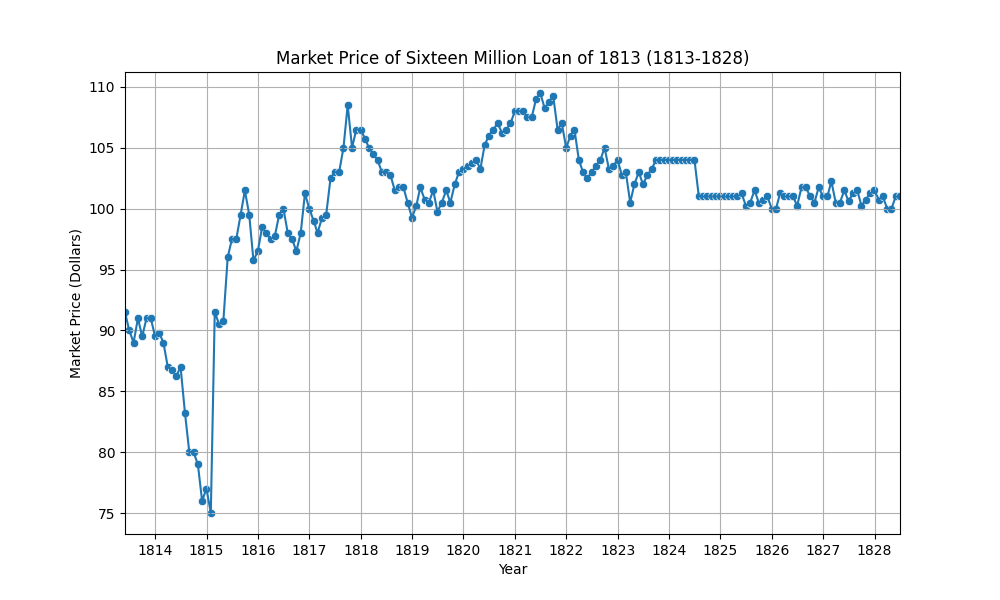

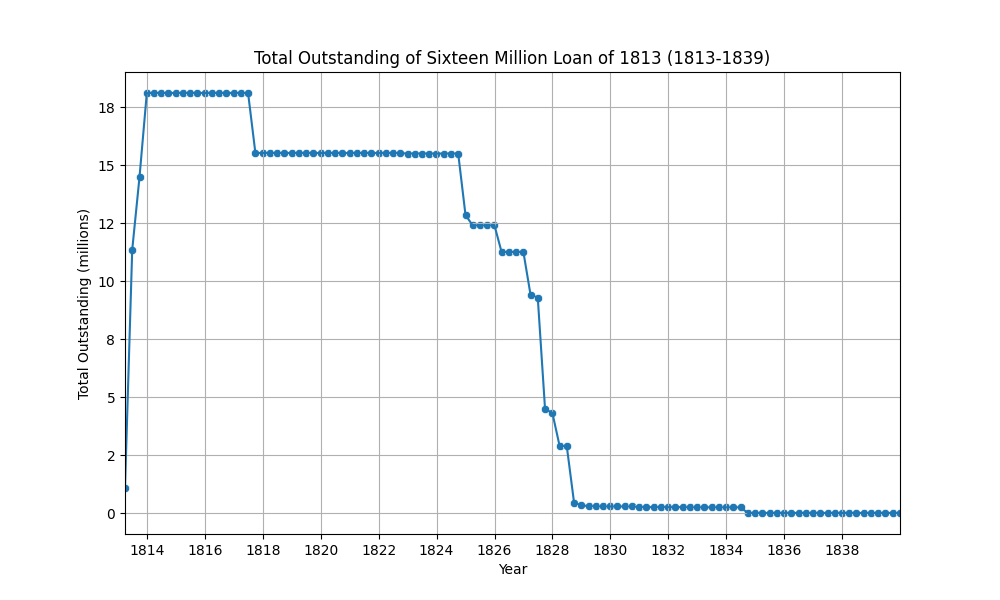

True


In [12]:
# Sixteen million loan of 1813 
sixteen_mil_prices = bond_price[bond_price["L1 ID"] == 20052] 
sixteen_mil_melted = melt_clean_price(sixteen_mil_prices) # clean and melt (reformat) dataframe 
sixteen_mil = graph_price(sixteen_mil_melted, 'Market Price of Sixteen Million Loan of 1813 (1813-1828)') 
sixteen_mil.show()

# quantities 
sixteen_mil_quant = bond_quant[bond_quant["L1 ID"] == 20052]
clean_sixteen_mil_quant = clean_quant(sixteen_mil_quant)
total_outstanding = reformat_quant(clean_sixteen_mil_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Sixteen Million Loan of 1813 (1813-1839)", "mil") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_sixteen_mil_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()
print(public_holdings.equals(total_outstanding))

## Treasury Notes of 1813 

### Overview and Features 
<b>Features:</b> Congress authorized the treasury notes on February 25, 1813. They allowed the Treasury to issue no more than <b>\$ 5 million</b>. The bonds <b>sold at par</b>. Buyers could redeem them after <b>one year</b>. Congress set a fixed interest rate of <b>5.4%</b>. Agents earned a commission of 1/4th of a cent [1]. Congress only issued notes in \$100 and \$1000 denominations [3]. Congress allowed individuals to give their notes to another person [5].

<b>Overview:</b> Gallatin wanted to replace the treasury notes authorized in 1812 because the war effort required an additional borrowing of \\$ 19 million. Republicans refused to raise taxes. The 5 million in notes would be a part of the 16 million loan passed on Feb. 8. Congress intended these notes to supplement shortfalls in long-term loans. However, Congress did nothing to support the notes in circulation [2]. Gallatin's plan did not succeed. Madison asked Congress for an additional \$ 7.5 million [4]. 

### Marketing
<b>Marketing:</b> Treasury Secretary Dallas stated in a report in 1815, the treasury notes issued before 1815 could not be used as a medium of exchange because Congress set the denominations too high (\\$ 100, \$ 1000), which made the early treasury notes (before 1815) unappealing for individuals. The Treasury considered the notes as legal tender. Notes also accrued short-term interest [2]. Despite the large denominations, Congress allowed individuals to give notes to each other and use notes to pay taxes, duties, and buy land anywhere. When using treasury notes to pay, the holder earned the principal amount and accrued interest [5]. 

### Buyers 
<b>Buyers:</b> Banks used treasury notes for their reserves [2]. Since treasury notes had high denominations and could be used as payment, wealthy Americans may have bought more than average Americans. 

#### Sources
[1] Richard Bayley 

[2] <I>Monetary Aspects of the Treasury Notes of the War of 1812</I> by Donald H. Kagin

[3] Treasury notes fill gap to support War of 1812 by Paul Gilkes 

[4] <I>Financing the War of 1812</i> by Brandy Heritage Center

[5] <I>An Act authorizing the issuing of Treasury notes for the service of the year one thousand eight hundred and thirteen</I> by the Twelfth Congress

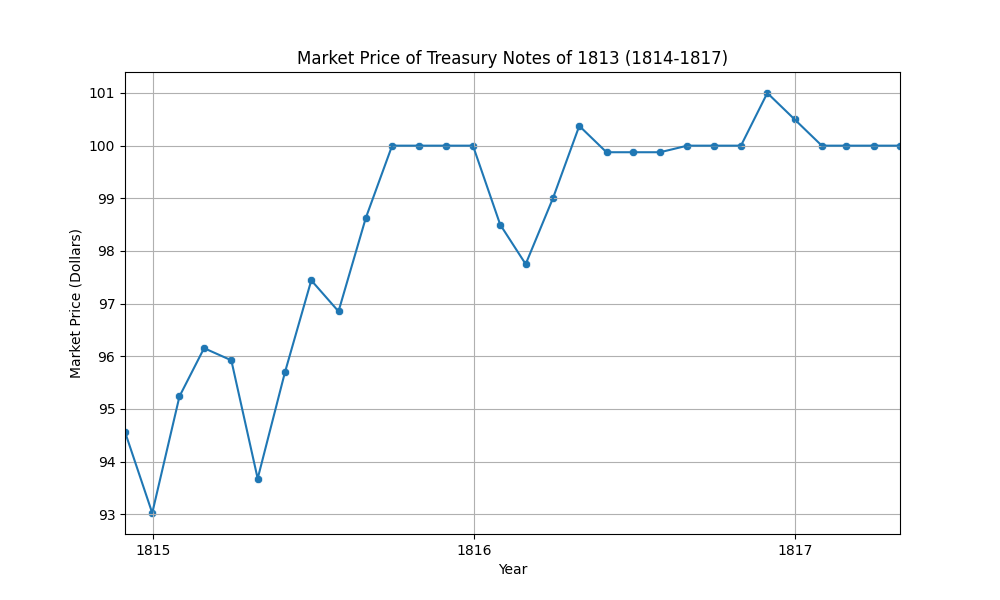

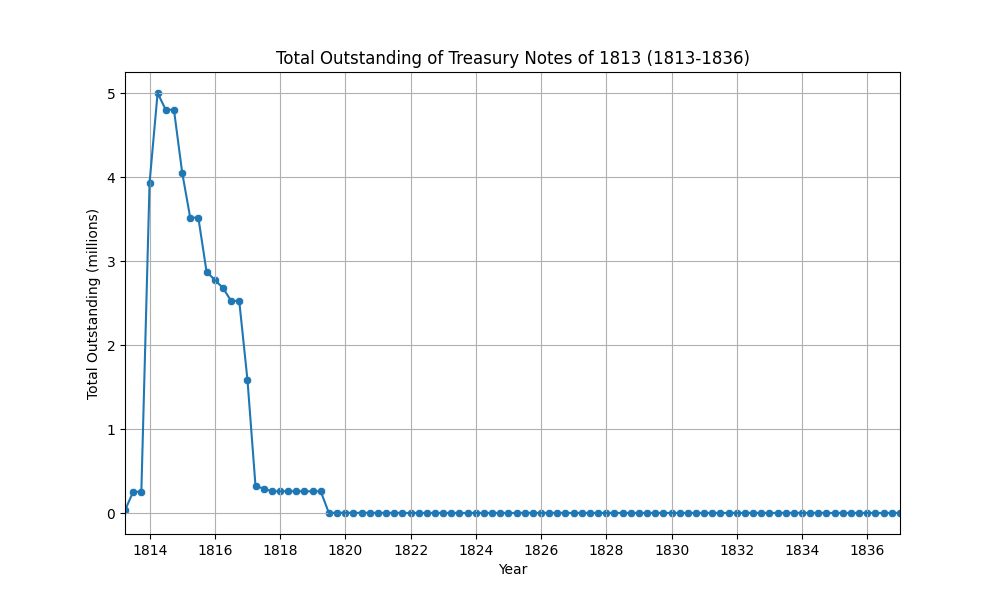

True


In [14]:
# Treasury Notes of 1813 
treasury_notes_1813_prices = bond_price[bond_price["L1 ID"] == 20053] 
treasury_notes_1813_melted = melt_clean_price(treasury_notes_1813_prices) # clean and melt (reformat) dataframe 
treasury_notes_1813 = graph_price(treasury_notes_1813_melted, 'Market Price of Treasury Notes of 1813 (1814-1817)') 
treasury_notes_1813.show()

# quantities 
treasury_notes_1813_quant = bond_quant[bond_quant["L1 ID"] == 20053]
clean_treasury_notes_1813_quant = clean_quant(treasury_notes_1813_quant)
total_outstanding = reformat_quant(clean_treasury_notes_1813_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Treasury Notes of 1813 (1813-1836)", "mil") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_treasury_notes_1813_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()
print(public_holdings.equals(total_outstanding))

## Seven and One-Half Million Loan of 1813 

### Overview and Features
Features: Congress authorized the loan on August 2, 1813. They authorize \\$ 7.5 million. The bonds sold at 88.25% face value, a discount. They could not be sold less than \$ 88. Buyers could redeem them after Jan. 1, 1826. Congress set a fixed interest rate of 6% and interest paid quarterly. Agents earned a commission of 1/4th of a cent [1]. The interest rate and sell price remained identical to the terms laid out by the syndicate [4].

Overview: Congress set aside \\$ 8 million for interest payments and reimbursement [2]. Secretary of the Navy William Jones became acting Treasury Secretary in May, 1845 and sold \$ 8.5 million worth of the bonds. Gallatin stated the bonds sold quicker than the 16 million loan in 1812 [3]. According to Jones, the entire loan had been subscribed by the first months of 1814 [3]. The final redemption occurred on August 2, 1845 [1]. 

### Marketing

### Buyers

#### Sources
[1] Richard Bayley 

[2] <I>An Act authorizing a loan for a sum not exceeding seven millions five hundred thousand dollars.</I> by Thirteenth Congress

[3] <I>The Financial History of the War of 1812</I> by Lisa R. Morales

[4] <I>American Public Finance and Financial Services 1700-1815</i> by Edwin J. Perkins

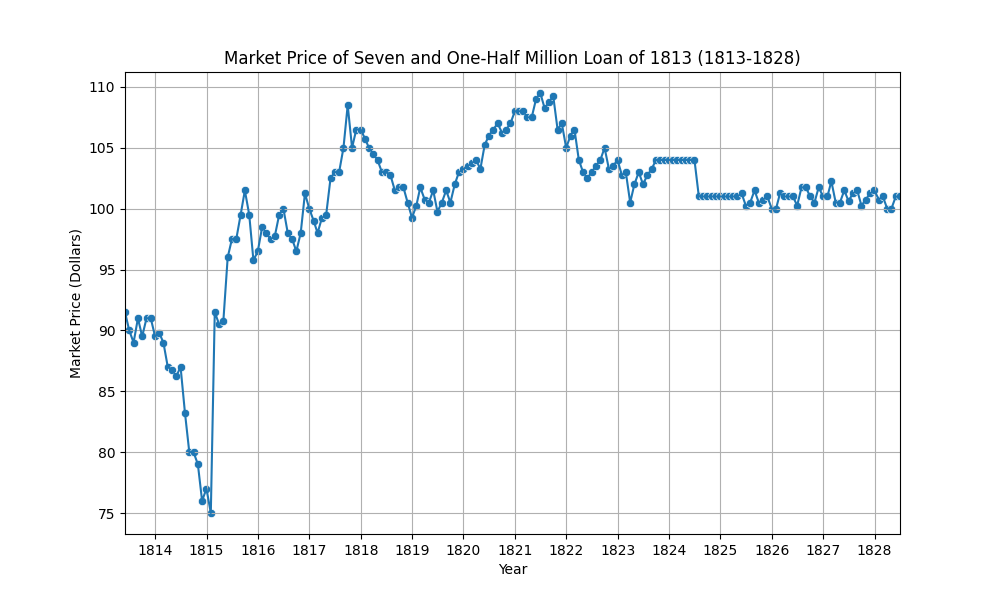

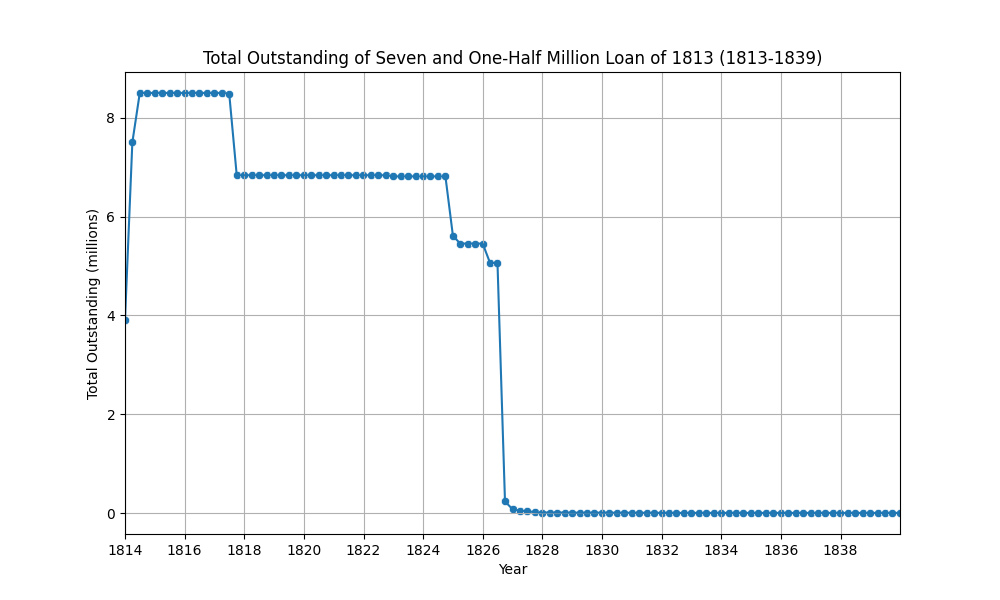

True


In [15]:
# seven and one-half million loan of 1813 
seven_one_half_prices = bond_price[bond_price["L1 ID"] == 20054] 
seven_one_half_melted = melt_clean_price(seven_one_half_prices) # clean and melt (reformat) dataframe 
seven_one_half = graph_price(seven_one_half_melted, 'Market Price of Seven and One-Half Million Loan of 1813 (1813-1828)') 
seven_one_half.show()

# quantities 
seven_one_half_quant = bond_quant[bond_quant["L1 ID"] == 20054]
clean_seven_one_half_quant = clean_quant(seven_one_half_quant)
#print(clean_seven_one_half_quant) 
total_outstanding = reformat_quant(clean_seven_one_half_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Seven and One-Half Million Loan of 1813 (1813-1839)", "mil") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_seven_one_half_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()
print(public_holdings.equals(total_outstanding))

/var/folders/ct/jjmfnk013tn1r7zs75r9b1gw0000gn/T/ipykernel_10909/3070363276.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 6))


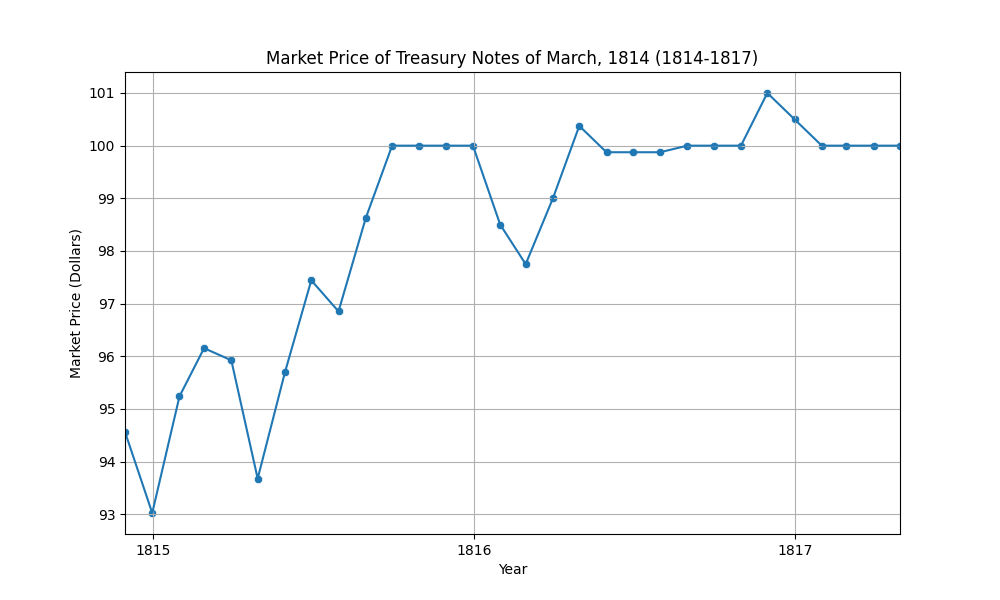

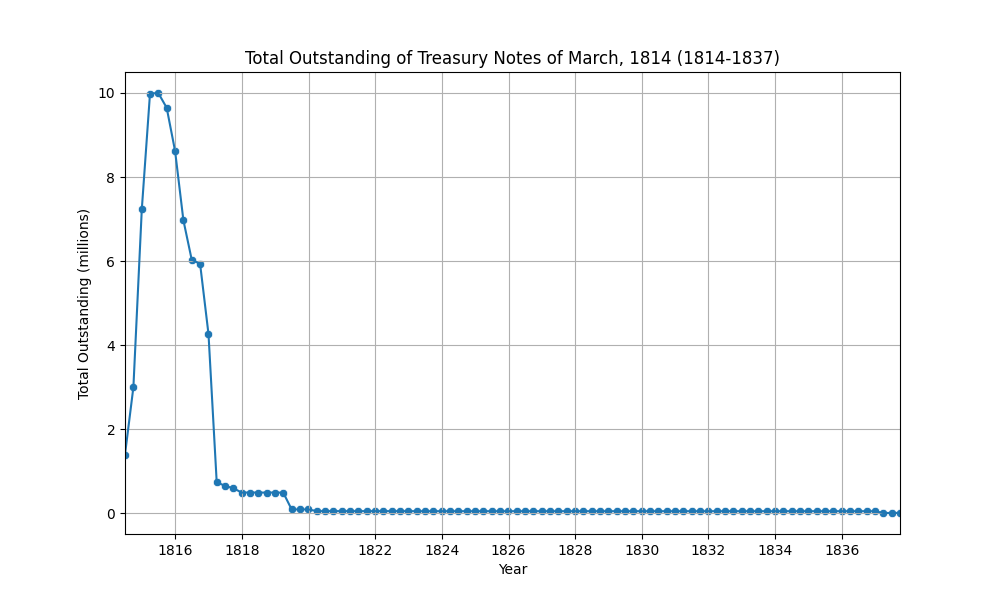

True


In [16]:
# treasury notes of March, 1814
notes_1814_prices = bond_price[bond_price["L1 ID"] == 20055] 
notes_1814_melted = melt_clean_price(notes_1814_prices) # clean and melt (reformat) dataframe 
notes_1814 = graph_price(notes_1814_melted, "Market Price of Treasury Notes of March, 1814 (1814-1817)")  
notes_1814.show()

# quantities 
notes_1814_quant = bond_quant[bond_quant["L1 ID"] == 20055]
clean_notes_1814_quant = clean_quant(notes_1814_quant)
#print(clean_seven_one_half_quant) 
total_outstanding = reformat_quant(clean_notes_1814_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Treasury Notes of March, 1814 (1814-1837)", "mil") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_notes_1814_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()
print(public_holdings.equals(total_outstanding))

## Ten Million Loan of 1814

### Overview and Features
Congress authorized the loan on March 24, 1814. They authorized \\$ 25 million. The bond was redeemable after December 31, 1826. It sold at a discount of 80 percent face value. Interest rate was set at 6 percent in quarterly payments on January, April, July, and October. Approximately \\$ 10 million was issued [1]. Agents received a commission of 0.0025 times the amount sold. Congress appropriated \$ 8 million to reimburse and pay interest on the loan [2].  

### Marketing
Treasury Secretary George W. Campbell realized he would struggle to raise \\$ 25 million at once. He decided to raise \\$ 10 million first. He received offers totaling \\$ 11.9 million without relying on loan contractors. He sold \\$ 9.2 million at \$ 88 per subscription. He ignored the remaining \\$ 2.7 million since they offered less per subscription. In return, the Treasury offered a rebate to anyone who bought the intial \\$ 9.2 million if the price of the bond fell below \\$ 88. Thus, the Treasury protected initial buyers from price decreases [3]. 

### Buyers 
Jacob Barker: He was a successful New York merchant. He purchased \$ 5 million worth of bonds (half of the total issue). Barker used a leveraged transaction to buy them; Barker sought loans from banks in the northeast to purchase the bonds and used the bonds as collateral [3]. 

#### Sources
[1] Richard Bayley 

[2] <i>An act to authorize a loan for a sum not exceeding twenty-five millions of dollars.</i> by Thirteenth Congress

[3] <i>American Public Finance and Financial Services 1700-1815</i> by Edwin J. Perkins (334) 

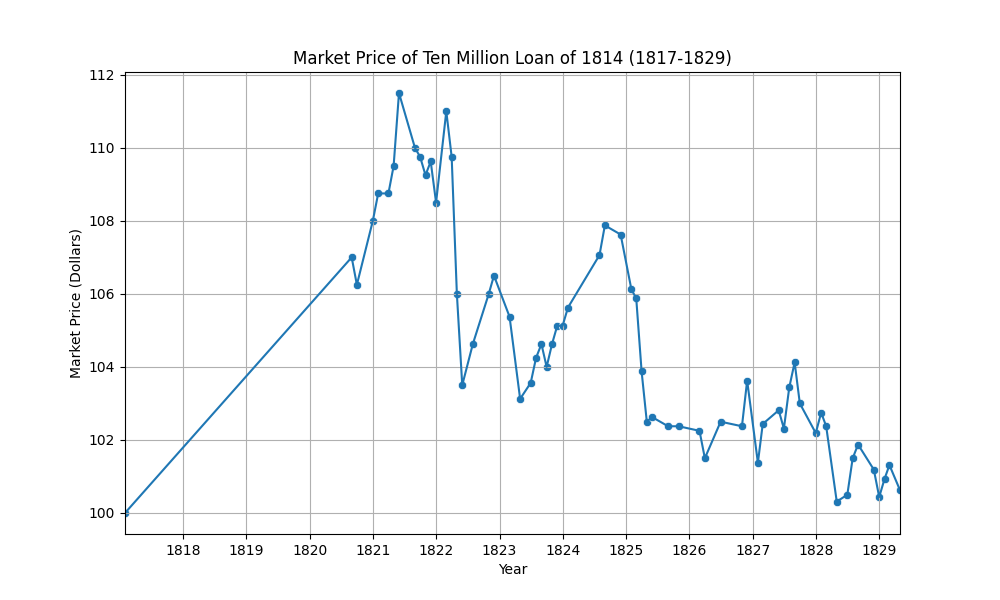

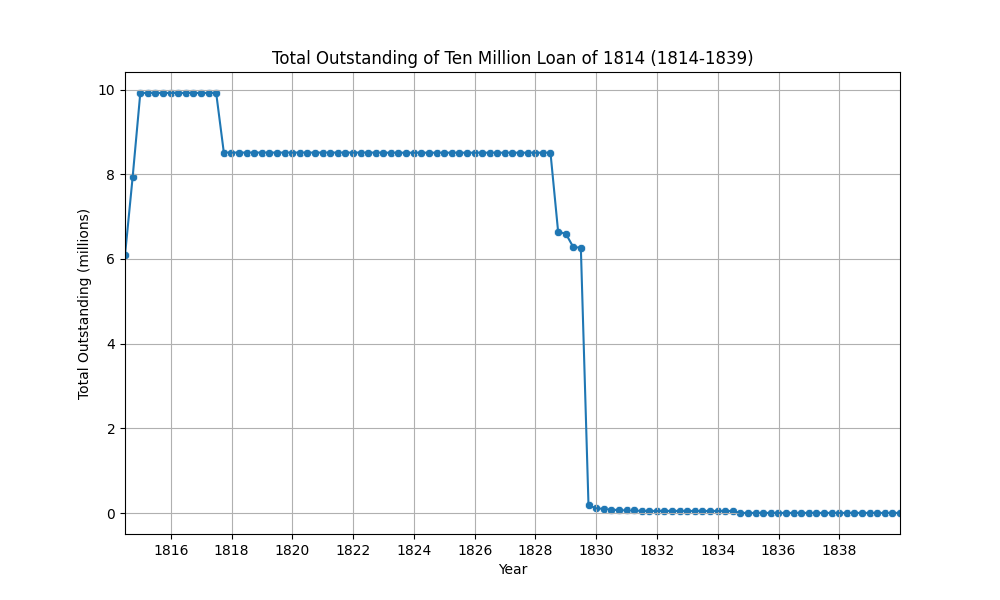

True


In [18]:
# 10 mil loan of 1814 
ten_mil_prices = bond_price[bond_price["L1 ID"] == 20056] 
ten_mil_melted = melt_clean_price(ten_mil_prices) # clean and melt (reformat) dataframe 
ten_mil = graph_price(ten_mil_melted, "Market Price of Ten Million Loan of 1814 (1817-1829)")  
ten_mil.show()

# quantities 
ten_mil_quant = bond_quant[bond_quant["L1 ID"] == 20056]
clean_ten_mil_quant = clean_quant(ten_mil_quant)
total_outstanding = reformat_quant(clean_ten_mil_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Ten Million Loan of 1814 (1814-1839)", "mil") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_ten_mil_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()
print(public_holdings.equals(total_outstanding))

## Six Million Loan of 1814

### Overview and Features
Congress already authorized a \\$ 25 million loan on March 24, 1824. Treasury Secretary Campbell chose to raise the loan in small increments, starting with \\$ 10 million. He tried to raise another \\$ 6 million starting July 25, 1814. The features of the bonds remained the same as the 10 million loan: 6 percent interest, quarterly payments, and sold at a discount of 80 percent [1]. 

### Marketing
Agents earned commissions on any subscriptions over \\$ 25000. When bonders got sold, buyers would receive a scrip certificate. After completing the entire payment, the certificates could be converted to long-term bonds after presenting them to a state official [1]. 

### Buyers 
- six banks in Philadephia to pay for Philadelphia's defense. 
#### Sources
[1] Richard Bayley

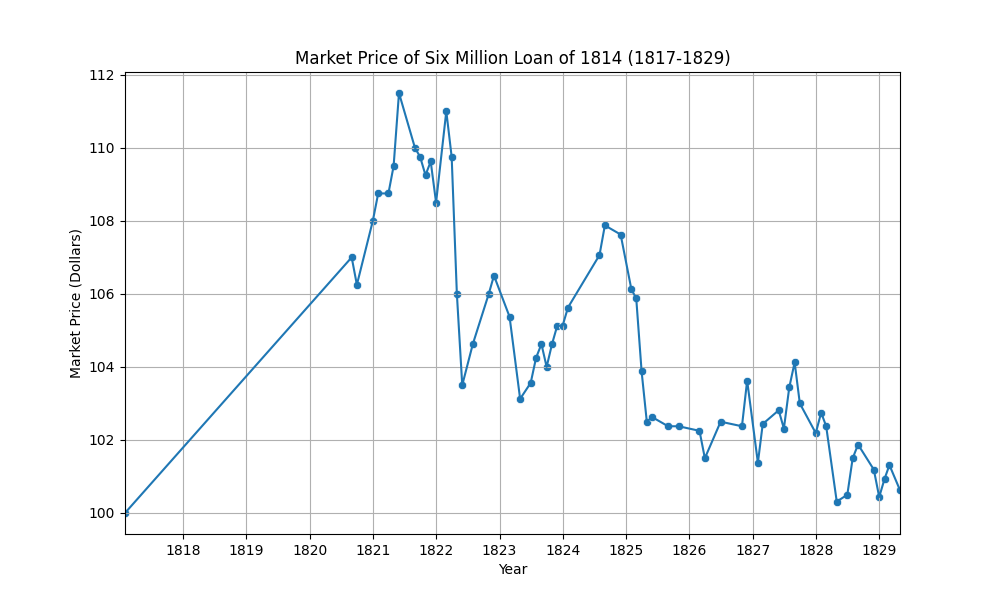

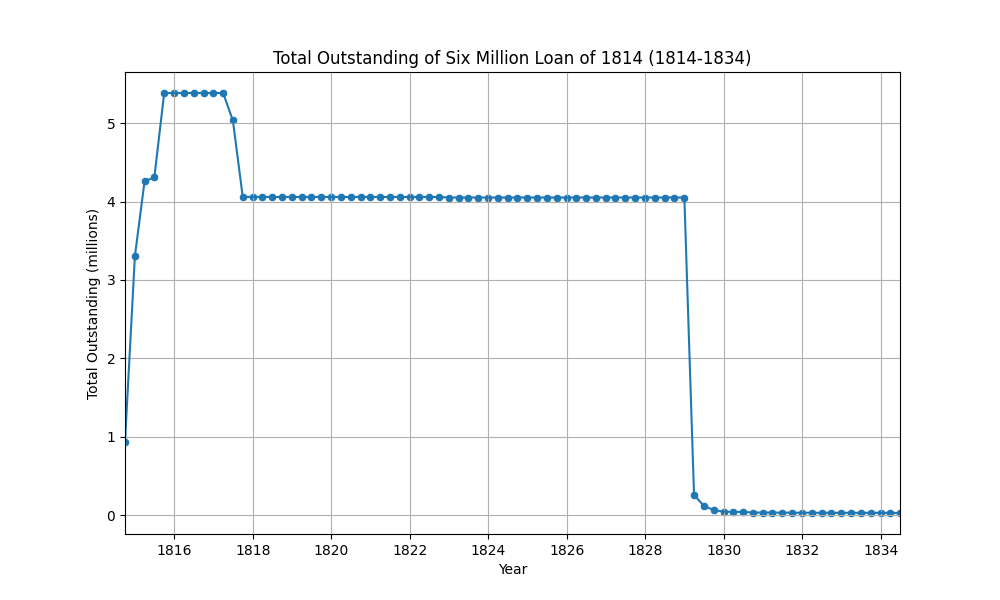

True


In [20]:
# Six Million Loan of 1814 
six_mil_1814_prices = bond_price[bond_price["L1 ID"] == 20057] 
six_mil_1814_melted = melt_clean_price(six_mil_1814_prices) # clean and melt (reformat) dataframe 
six_mil_1814 = graph_price(six_mil_1814_melted, "Market Price of Six Million Loan of 1814 (1817-1829)")  
six_mil_1814.show()

# quantities 
six_mil_1814_quant = bond_quant[bond_quant["L1 ID"] == 20057]
clean_six_mil_1814_quant = clean_quant(six_mil_1814_quant)
total_outstanding = reformat_quant(clean_six_mil_1814_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Six Million Loan of 1814 (1814-1834)", "mil") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_six_mil_1814_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()
print(public_holdings.equals(total_outstanding))

## Undesignated Loan of 1814 

### Overview and Features
Congress authorized the loan on March 24, 1814, not to exceed \\$ 25 million. This is the same act referenced in the 10 million and 6 million loans of 1814. The bond could be redeemed after December 31, 1826. It sold at 80 to 95 percent of its face value. Interest rate was set at 6 percent in quarterly payments on January, April, July, and October. The final redemption occurred on August 15, 1834. \\$ 746,403.31 was issued [1]. 

### Marketing

### Buyers
Several corporations in Baltimore subscribed to \\$ 150,000 of bonds to build a steam frigate to defend the city's port. The Bank of Pennsylvania subscribed to \\$ 43,222. The Bank of Columbia subscribed to \\$ 25000 and \\$ 100,000 from the Mechanics' Bank of Alexandria.

Bank of Columbia: located in the Washington DC (District of Columbia) 
Bank of Pennsylvania: established in 1793 and located in Philadelphia [4]   
Mechanics' Bank of Alexandria: chartered by Congress [2]; first incorporated in Alexandria, Virginia by an act of Congress in 1812 [3]  

#### Sources 
[1] Richard Bayley 

[2] <i>An Act to extend the charter of the Mechanics' Bank of Alexandria, in the District of Columbia.</i> by Seventeenth Congress

[3] <i>An Act to incorporate a Bank in the town of Alexandria, by the name and style of the Mechanics' Bank of Alexandria</i> by Twelfth Congress 

[4] Klein, Philip Shriver; Ari Hoogenboom (1973). A History of Pennsylvania. Penn State Press. p. 223. 

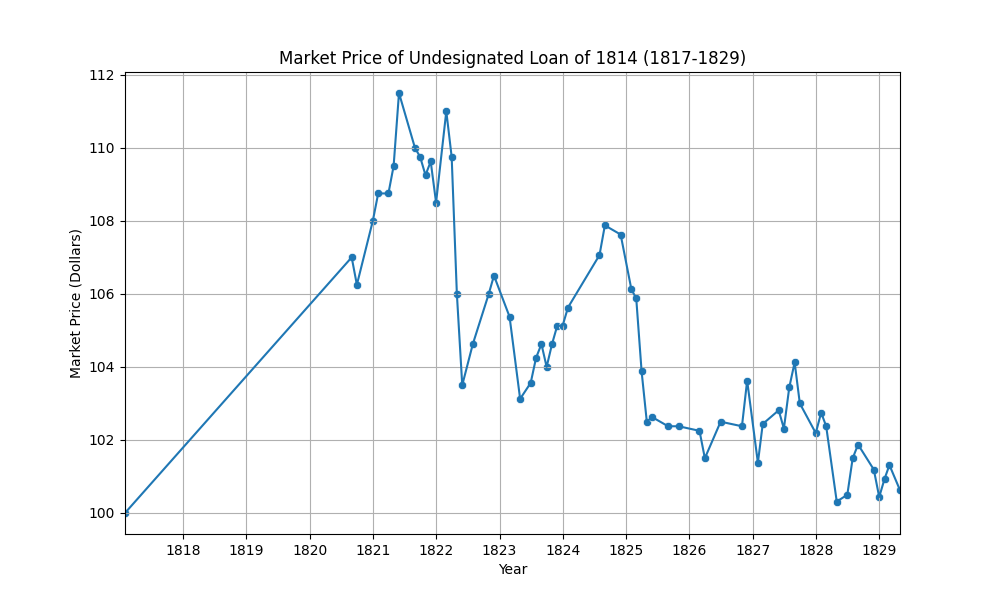

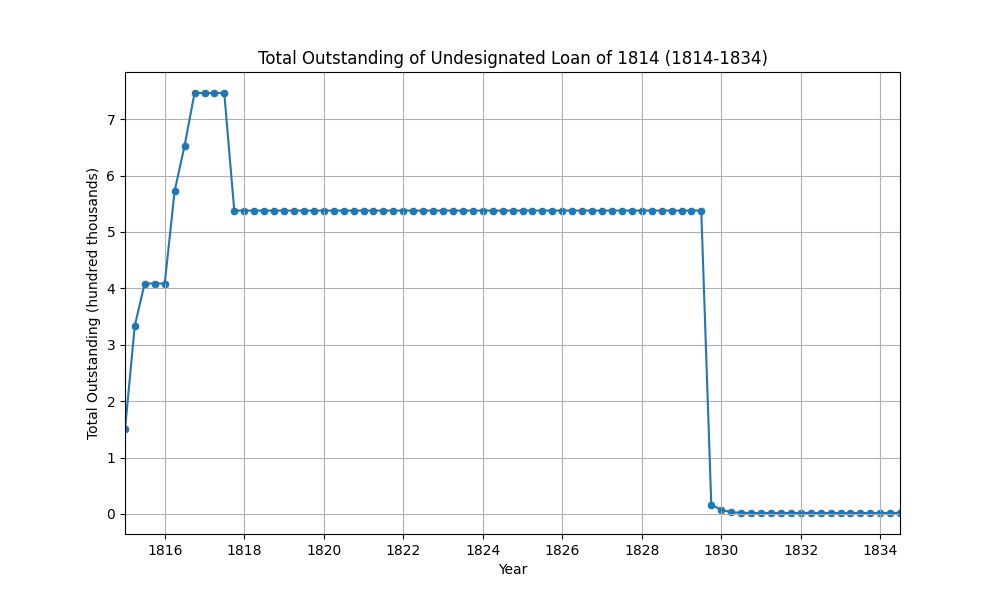

True


In [21]:
# Undesignated Loan of 1814
undesignated_1814_prices = bond_price[bond_price["L1 ID"] == 20058] 
undesignated_1814_melted = melt_clean_price(undesignated_1814_prices) # clean and melt (reformat) dataframe 
undesignated_1814 = graph_price(undesignated_1814_melted, "Market Price of Undesignated Loan of 1814 (1817-1829)")  
undesignated_1814.show()

# quantities 
undesignated_1814_quant = bond_quant[bond_quant["L1 ID"] == 20058]
clean_undesignated_1814_quant = clean_quant(undesignated_1814_quant)
total_outstanding = reformat_quant(clean_undesignated_1814_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Undesignated Loan of 1814 (1814-1834)", "ht") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_undesignated_1814_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()
print(public_holdings.equals(total_outstanding))